In [98]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import *

import seaborn as sns

In [61]:
df = pd.read_csv('data_final/merged_all_final.csv')

In [62]:
df.head()

,Country,Region,iso_a3,wh_score,gdi,gii,efs,pdn,year
0,Albania,Southern Europe,ALB,4.655,0.970,0.256,65.650034,105.135146,2015
1,Algeria,Northern Africa,DZA,6.355,0.858,0.442,48.881858,16.680253,2015
2,Angola,Sub-Saharan Africa,AGO,3.866,0.838,0.575,47.885804,22.366552,2015
3,Armenia,Western Asia,ARM,4.360,0.977,0.301,67.125092,102.759150,2015
4,Australia,Australia and New Zealand,AUS,7.313,0.975,0.110,81.387287,3.100113,2015


#### One Hot Encoding

In [68]:
dummies = pd.get_dummies(df.Region)
samples = df.join(dummies)

In [69]:
samples.head()

,Country,Region,iso_a3,wh_score,gdi,gii,efs,pdn,year,Australia and New Zealand,...,Latin America and the Caribbean,Northern Africa,Northern America,Northern Europe,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
0,Albania,Southern Europe,ALB,4.655,0.970,0.256,65.650034,105.135146,2015,0,...,0,0,0,0,0,0,1,0,0,0
1,Algeria,Northern Africa,DZA,6.355,0.858,0.442,48.881858,16.680253,2015,0,...,0,1,0,0,0,0,0,0,0,0
2,Angola,Sub-Saharan Africa,AGO,3.866,0.838,0.575,47.885804,22.366552,2015,0,...,0,0,0,0,0,0,0,1,0,0
3,Armenia,Western Asia,ARM,4.360,0.977,0.301,67.125092,102.759150,2015,0,...,0,0,0,0,0,0,0,0,1,0
4,Australia,Australia and New Zealand,AUS,7.313,0.975,0.110,81.387287,3.100113,2015,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.Region.unique()

array(['Southern Europe', 'Northern Africa', 'Sub-Saharan Africa',
       'Western Asia', 'Australia and New Zealand', 'Western Europe',
       'Southern Asia', 'Eastern Europe',
       'Latin America and the Caribbean', 'South-eastern Asia',
       'Northern America', 'Eastern Asia', 'Northern Europe',
       'Central Asia'], dtype=object)

In [49]:
regions = df.Region.unique()
dct = {val : idx + 1 for idx, val in enumerate(regions)}

In [52]:
for k in dct:
    dct[k] = 'region_' + str(dct[k])

In [53]:
dct

{'Southern Europe': 'region_1',
 'Northern Africa': 'region_2',
 'Sub-Saharan Africa': 'region_3',
 'Western Asia': 'region_4',
 'Australia and New Zealand': 'region_5',
 'Western Europe': 'region_6',
 'Southern Asia': 'region_7',
 'Eastern Europe': 'region_8',
 'Latin America and the Caribbean': 'region_9',
 'South-eastern Asia': 'region_10',
 'Northern America': 'region_11',
 'Eastern Asia': 'region_12',
 'Northern Europe': 'region_13',
 'Central Asia': 'region_14'}

In [70]:
samples.rename(columns=dct, inplace=True)

In [72]:
samples.head()

,Country,Region,iso_a3,wh_score,gdi,gii,efs,pdn,year,region_5,...,region_9,region_2,region_11,region_13,region_10,region_7,region_1,region_3,region_4,region_6
0,Albania,Southern Europe,ALB,4.655,0.970,0.256,65.650034,105.135146,2015,0,...,0,0,0,0,0,0,1,0,0,0
1,Algeria,Northern Africa,DZA,6.355,0.858,0.442,48.881858,16.680253,2015,0,...,0,1,0,0,0,0,0,0,0,0
2,Angola,Sub-Saharan Africa,AGO,3.866,0.838,0.575,47.885804,22.366552,2015,0,...,0,0,0,0,0,0,0,1,0,0
3,Armenia,Western Asia,ARM,4.360,0.977,0.301,67.125092,102.759150,2015,0,...,0,0,0,0,0,0,0,0,1,0
4,Australia,Australia and New Zealand,AUS,7.313,0.975,0.110,81.387287,3.100113,2015,1,...,0,0,0,0,0,0,0,0,0,0


In [89]:
m1 = ols('wh_score ~ gdi',samples).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               wh_score   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     111.3
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          7.76e-158
Time:                        22:49:57   Log-Likelihood:                -434.12
No. Observations:                 548   AIC:                             902.2
Df Residuals:                     531   BIC:                             975.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5399      0.444     14.739      0.0

In [90]:
m2 = ols('wh_score ~ gii',samples).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               wh_score   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     111.3
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          7.76e-158
Time:                        22:50:01   Log-Likelihood:                -434.12
No. Observations:                 548   AIC:                             902.2
Df Residuals:                     531   BIC:                             975.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5399      0.444     14.739      0.0

In [91]:
m3 = ols('wh_score ~ efs',samples).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               wh_score   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     111.3
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          7.76e-158
Time:                        22:50:07   Log-Likelihood:                -434.12
No. Observations:                 548   AIC:                             902.2
Df Residuals:                     531   BIC:                             975.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5399      0.444     14.739      0.0

In [92]:
m4 = ols('wh_score ~ pdn',samples).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               wh_score   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     111.3
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          7.76e-158
Time:                        22:50:12   Log-Likelihood:                -434.12
No. Observations:                 548   AIC:                             902.2
Df Residuals:                     531   BIC:                             975.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5399      0.444     14.739      0.0

In [93]:
m5 = ols('wh_score ~ region_1+region_2+region_3+region_4+region_5+region_6+region_7+\
        region_8+region_9+region_10+region_11+region_12+region_13+region_14',samples).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               wh_score   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     111.3
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          7.76e-158
Time:                        22:50:17   Log-Likelihood:                -434.12
No. Observations:                 548   AIC:                             902.2
Df Residuals:                     531   BIC:                             975.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5399      0.444     14.739      0.0

In [94]:
m6 = ols('wh_score ~ gdi+gii+efs+region_1+region_2+region_3+region_4+region_5+region_6+region_7+\
        region_8+region_9+region_10+region_11+region_12+region_13+region_14',samples).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               wh_score   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     111.3
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          7.76e-158
Time:                        22:50:28   Log-Likelihood:                -434.12
No. Observations:                 548   AIC:                             902.2
Df Residuals:                     531   BIC:                             975.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5399      0.444     14.739      0.0

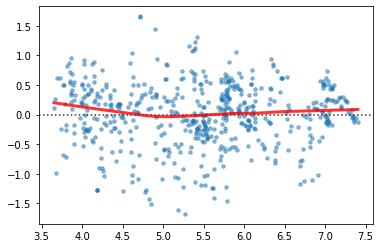

In [95]:
sns.residplot(m6.fittedvalues, m6.resid, lowess=True, 
              scatter_kws={"s": 12, 'alpha':0.5},
              line_kws={'color': 'red', 'lw':3, 'alpha':0.8})

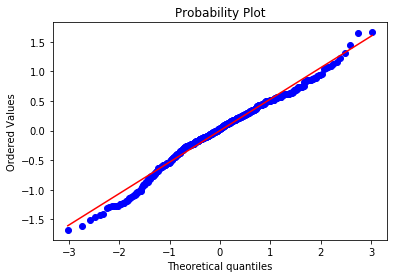

In [96]:
stats.probplot(m6.resid, plot=plt)
plt.show()

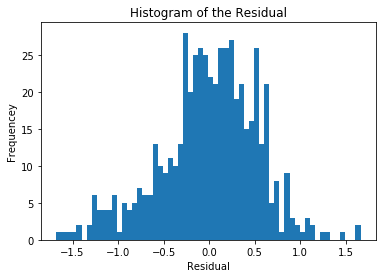

In [97]:
plt.hist(m6.resid, bins = 60)
plt.xlabel("Residual")
plt.ylabel("Frequencey")
plt.title("Histogram of the Residual")
plt.show()

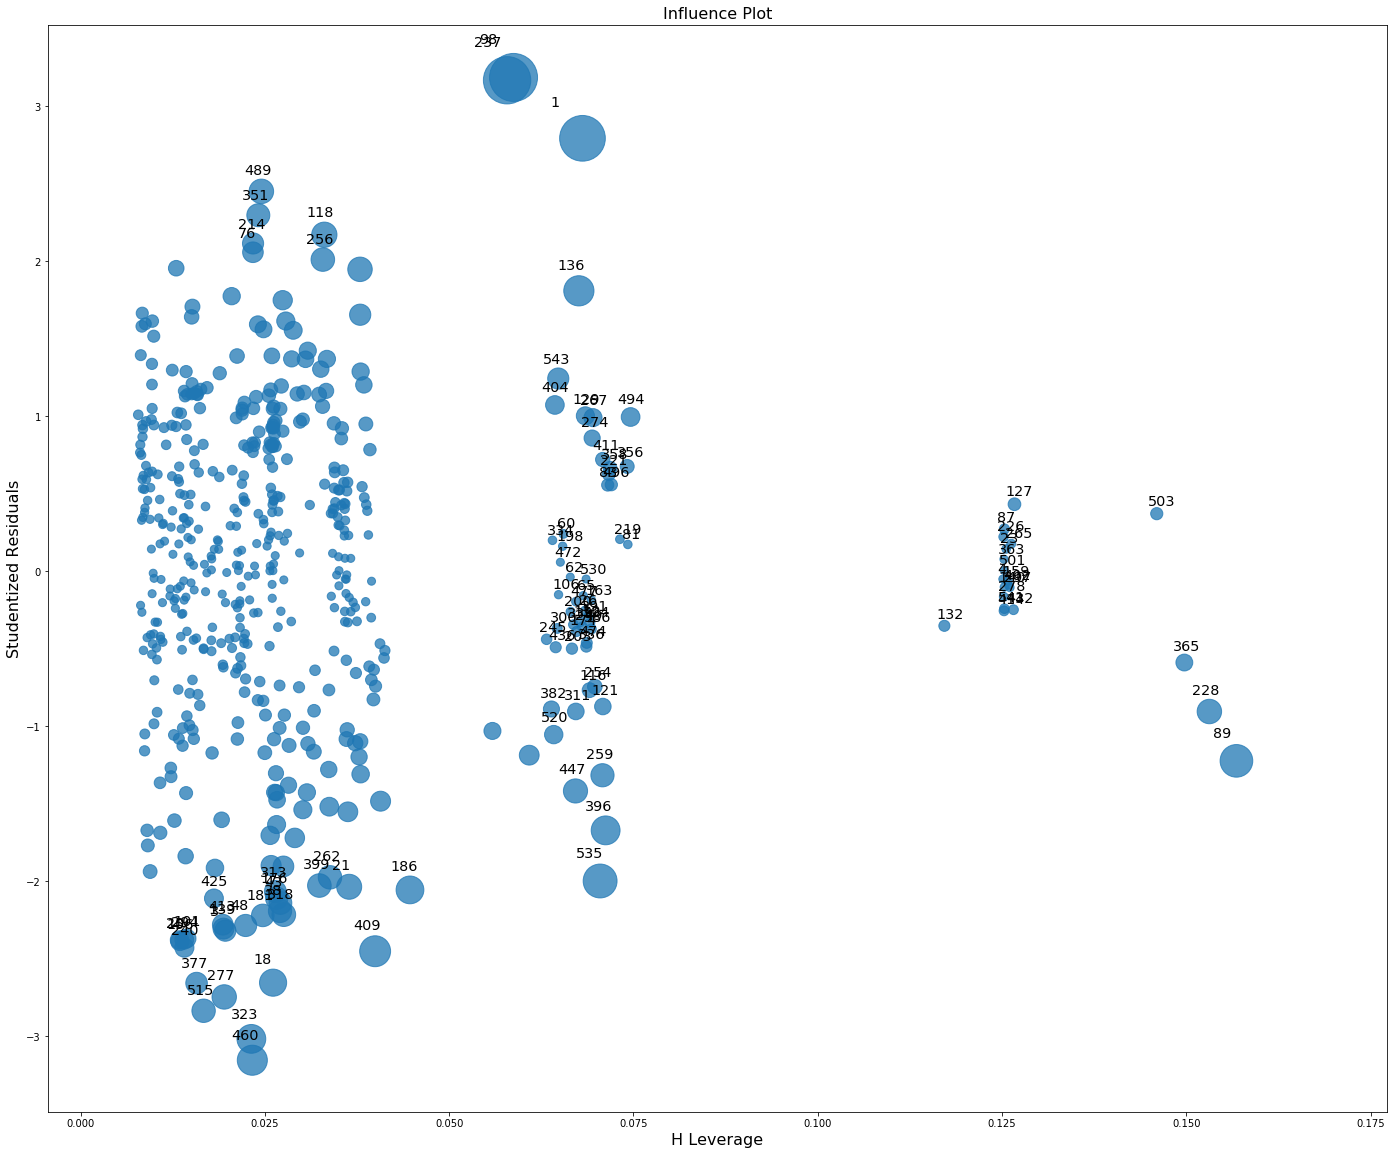

In [103]:
fig, ax = plt.subplots(figsize=(24,20))
fig = sm.graphics.influence_plot(m6, ax=ax, criterion="cooks" )
plt.show()